In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

In [2]:
intrusion = pd.read_csv("cybersecurity_intrusion_data.csv")

In [3]:
data = intrusion.copy()
data

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [4]:
data.dtypes

session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

In [5]:
data.dtypes.value_counts()

int64      5
object     4
float64    2
Name: count, dtype: int64

In [6]:
data.columns

Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

In [7]:
(data.isnull().sum()/data.shape[0]).sort_values()

session_id             0.000000
network_packet_size    0.000000
protocol_type          0.000000
login_attempts         0.000000
session_duration       0.000000
ip_reputation_score    0.000000
failed_logins          0.000000
browser_type           0.000000
attack_detected        0.000000
unusual_time_access    0.000000
encryption_used        0.206144
dtype: float64

In [8]:
X = data.drop(columns=['session_id',"attack_detected"])

In [9]:
X.shape

(9537, 9)

In [10]:
y = data['attack_detected']
y.shape

(9537,)

<Axes: ylabel='attack_detected'>

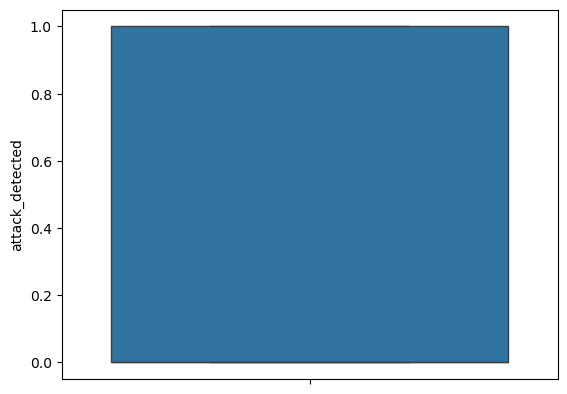

In [11]:
sns.boxplot(y)

In [12]:
from sklearn.compose import make_column_selector


In [13]:
numerical_features = make_column_selector(dtype_include=np.number)
non_numerical_features = make_column_selector(dtype_exclude=np.number)

In [14]:
numerical_features = numerical_features(X)
non_numerical_features = non_numerical_features(X)

In [15]:
print("numerical_features:",numerical_features)
print("non_numerical_features:",non_numerical_features) 

numerical_features: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access']
non_numerical_features: ['protocol_type', 'encryption_used', 'browser_type']


In [16]:
X.dtypes.value_counts()

int64      4
object     3
float64    2
Name: count, dtype: int64

In [17]:
for col in X.select_dtypes('object'):
    print(f'{col:-<40}{X[col].unique()}') 

protocol_type---------------------------['TCP' 'UDP' 'ICMP']
encryption_used-------------------------['DES' 'AES' nan]
browser_type----------------------------['Edge' 'Firefox' 'Chrome' 'Unknown' 'Safari']


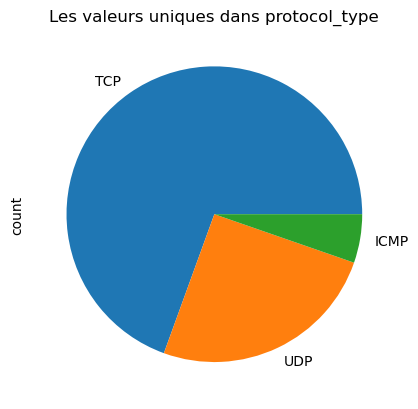

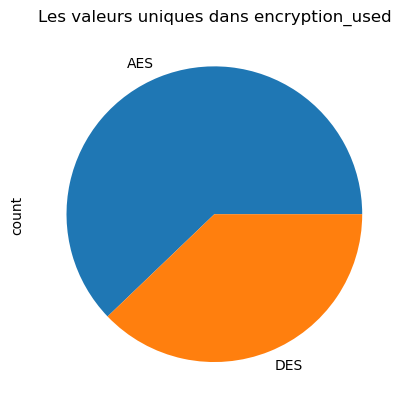

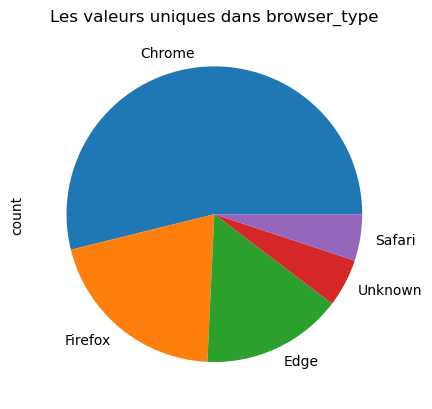

In [18]:
for col in X.select_dtypes('object'):
    plt.figure()
    X[col].value_counts().head(20).plot.pie()
    plt.title(f"Les valeurs uniques dans {col}")

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest,f_classif

In [20]:
print("Variables numériques:",numerical_features)
print("Variables non numériques:",non_numerical_features)

Variables numériques: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access']
Variables non numériques: ['protocol_type', 'encryption_used', 'browser_type']


In [21]:

numerical_pipeline = make_pipeline(PolynomialFeatures(1),RobustScaler(),
                                   SelectKBest(score_func=f_classif,k='all'))


non_numerical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(),
                                       PolynomialFeatures(1),
                                       SelectKBest(score_func=f_classif,k='all'))

In [22]:
numerical_pipeline

,steps,"[('polynomialfeatures', ...), ('robustscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,1
,interaction_only,False
,include_bias,True
,order,'C'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


In [23]:
non_numerical_pipeline

,steps,"[('simpleimputer', ...), ('onehotencoder', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [24]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),
                                       (non_numerical_pipeline,non_numerical_features))

In [25]:
preprocessor

,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,degree,1
,interaction_only,False
,include_bias,True


In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [27]:
X_train.shape

(7629, 9)

In [28]:
X_test.shape

(1908, 9)

In [29]:
X_train_propre = preprocessor.fit_transform(X_train,y_train)

/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [30]:
X_test_propre = preprocessor.transform(X_test)

In [31]:

from sklearn.ensemble import RandomForestClassifier

In [32]:
modelrf = RandomForestClassifier(n_estimators=100)
modelr = modelrf.fit(X_train_propre,y_train)

modelr

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
modelrf.score(X_test_propre,y_test)

0.8810272536687631

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

model_xgb = xgb.fit(X_train_propre,y_train) 

In [35]:

model_xgb.score(X_test_propre,y_test)

0.8841719077568134

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [37]:
def evaluation(model):
    model.fit(X_train_propre,y_train) 
    y_pred = model.predict(X_test_propre)   

    print(confusion_matrix(y_test,y_pred)) 
    print()
    print(classification_report(y_test,y_pred)) 

    N, train_score, val_score = learning_curve(model, X_train_propre, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(10,6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

[[1064   15]
 [ 212  617]]

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1079
           1       0.98      0.74      0.84       829

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.87      1908
weighted avg       0.90      0.88      0.88      1908



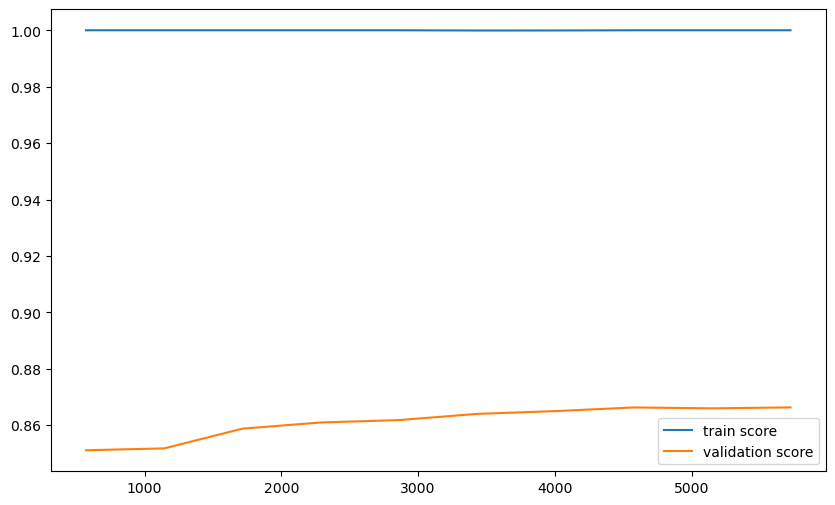

In [38]:
evaluation(modelrf)

[[1066   13]
 [ 208  621]]

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1079
           1       0.98      0.75      0.85       829

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



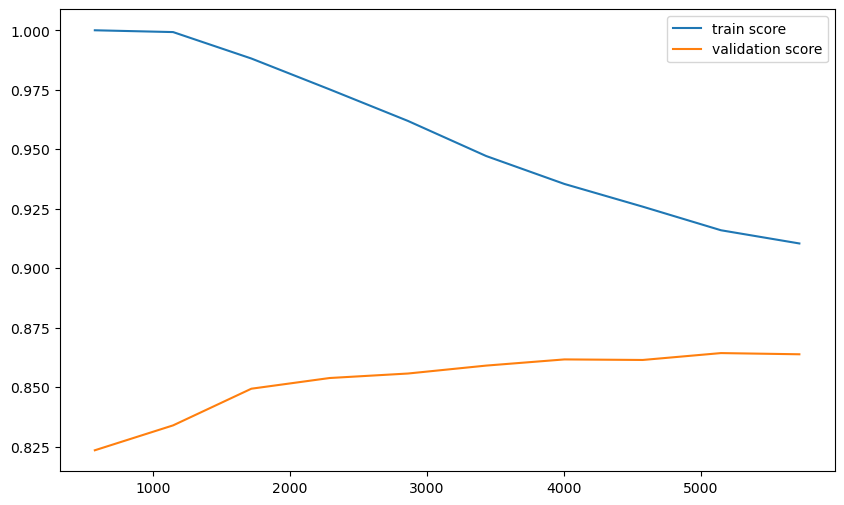

In [39]:
evaluation(model_xgb)

In [40]:
import lightgbm as lgb

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lgbm = lgb.LGBMClassifier(
    n_estimators=500,       # nombre d'arbres
    learning_rate=0.05,     # vitesse d'apprentissage
    max_depth=6,            # profondeur max de chaque arbre
    num_leaves=31,          # nombre max de feuilles par arbre
    subsample=0.8,          # fraction de lignes utilisées pour chaque arbre
    colsample_bytree=0.8,   # fraction de colonnes utilisées pour chaque arbre
    class_weight='balanced', # ajuste automatiquement pour classes déséquilibrées
    random_state=42,
    n_jobs=-1  , 
    verbose = -1           # utilise tous les CPU disponibles
)


In [41]:
modell = lgb.LGBMClassifier()

In [42]:
modell = lgbm.fit(X_train_propre,y_train)

In [43]:
modell.score(X_test_propre,y_test)

/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.8810272536687631

/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[[1057   22]
 [ 205  624]]

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1079
           1       0.97      0.75      0.85       829

    accuracy                           0.88      1908
   macro avg       0.90      0.87      0.87      1908
weighted avg       0.89      0.88      0.88      1908



/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/dolape/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warni

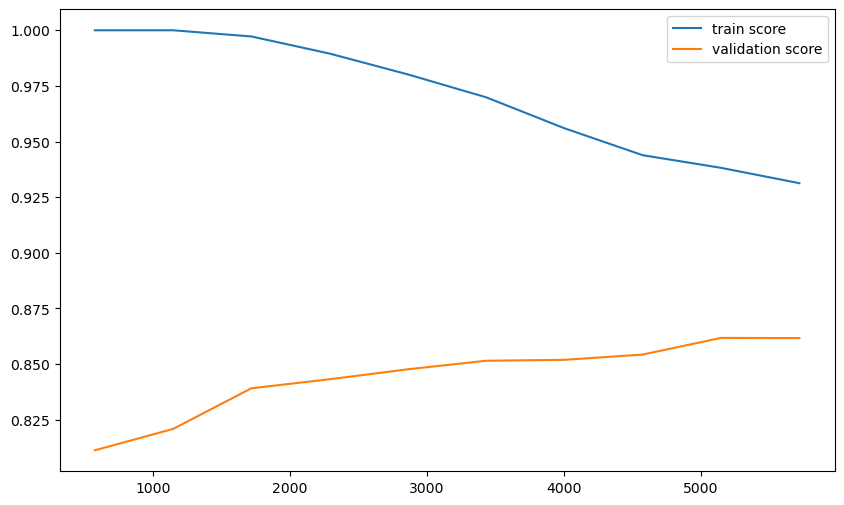

In [44]:
evaluation(modell)